In [1]:
# Calcula un índice por país de riesgo ante el cambio climático 

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
import holoviews as hv


# Parámetros de mapas
gv.extension("matplotlib")

def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4, "cmap": "plasma_r",
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180), "clim": (0, 10),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

def hook_2(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.95*b, w, 0.05*h])
options_2 = { "colorbar": True, "linewidth": 0.1, "cmap": "plasma_r",
    "hooks": [hook_2], "ylim":(-62,85), "xlim":(-180,180), "clim": (0, 10),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m_2 = { "bgcolor": "lightgray", "fontscale": 0.3, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Funciones a utilizar

# Mejora el formato de las tablas para su uso en documentos.
def display(vn, p = False, format = "{:.1f}",
    category = "", type = "index"):
    # vn:       variable principal
    # p:        indica si la variable es positiva
    # format:   formato a usar
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    #           En este caso solo está habilitado "index"
    #
    # regresa
    # disp:     objeto Dataframe
    #           de Pandas basado en la tabla de entrada

    # Países sin datos
    no_d = df_iso[ df_iso[vn].isnull() ].shape[0]
    print( f"Countries without data: {no_d} countries" )

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "index":
        disp = df_iso.loc[ df_iso[vn].notnull(),
            ["name"] + index_n ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Countries most at risk: {', '.join(c_list)}")

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso[cat], index_n ].mean()
            c_list = list( df_iso.loc[df_iso[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"{cat} most at risk: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso["region"] == cat, index_n ].mean()
    
    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "index":
        disp.iloc[r, 1:] = df_iso[ index_n ].mean()
    
    # Renombramos columnas
    # Resumen de variables
    if   type == "index":
        cols = ["Name"] + index_n
    disp.columns = cols

    # Regresamos la tabla
    return disp

In [3]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../share/Indexes/"

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Nombres de índices
index_n = [
    "Climate change risk index",
    "Climate change exposure index",
    "Social vulnerability index, physical climate impacts",
    "Sea level rise exposure index",
    "Drought exposure index",
    "Extreme heat exposure index",
    "Extreme rainfall exposure index",
    "Hurricane exposure index",
    "Life expectancy at birth index", "log GNI per capita, PPP index",
    "Gender Development index index", "% rural population index",
    "% population below 15 or above 65 years old index" ]
climate = index_n[1:2] + index_n[3:8]
social = index_n[2:3] + index_n[8:13]

# Índices climáticos y socioeconómicos
df_c = pd.read_csv(path_r + "climate_index.csv", index_col = ix)
df_s = pd.read_csv(path_r + "Physical_vulnerability_index.csv", index_col = ix)
df_iso[climate] = df_c[climate]
df_iso[social] = df_s[social]
df_iso = df_iso[ df_iso[index_n[1:3]].notnull().all(axis = 1) ]

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
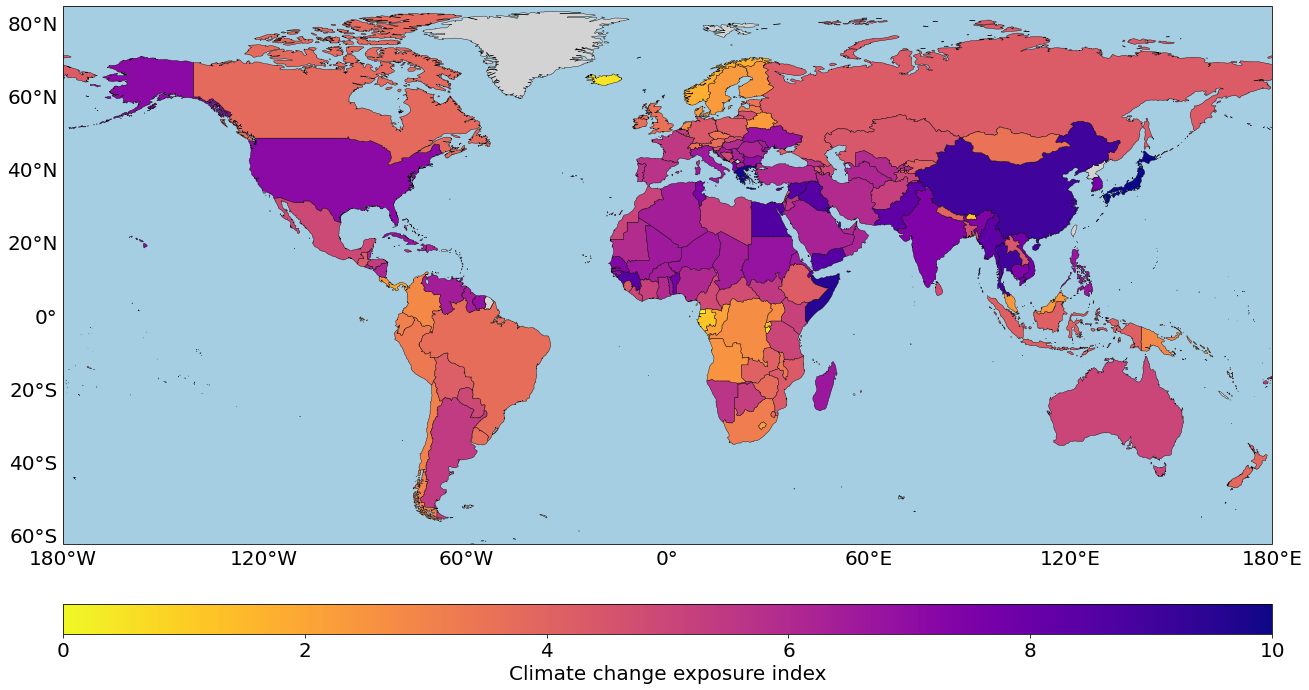

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Social vulnerability index, physical climate impacts)
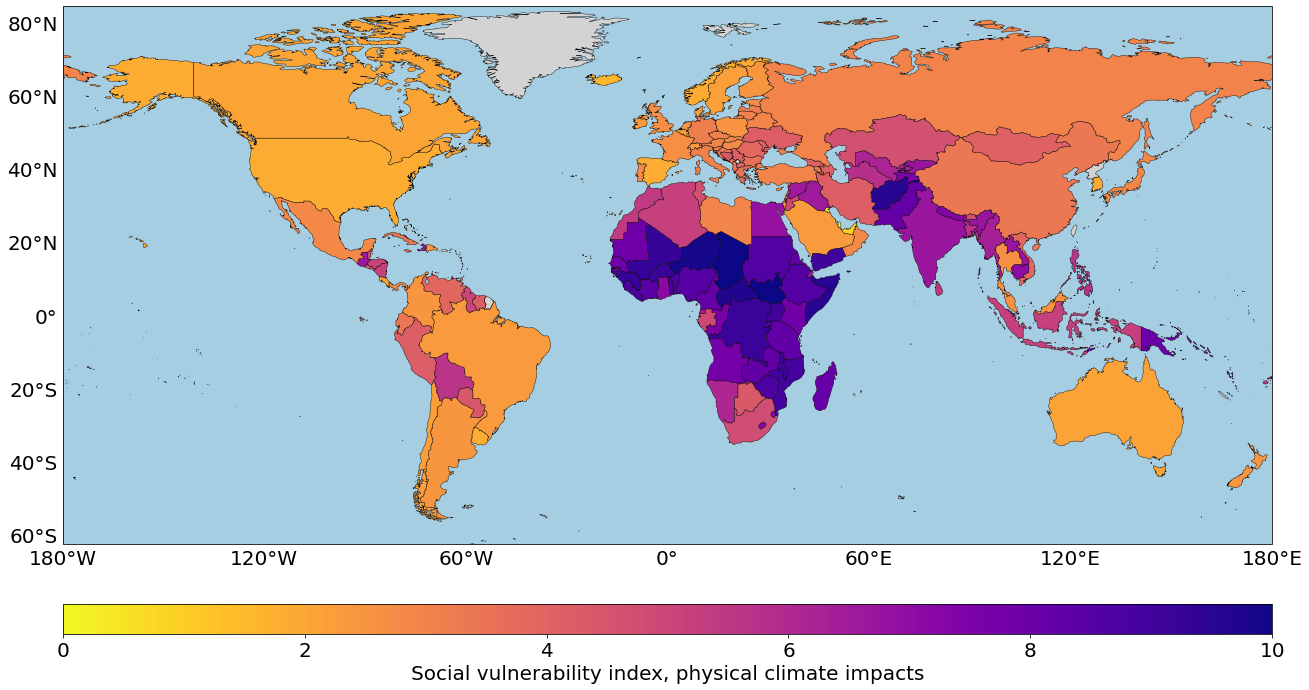

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change risk index)
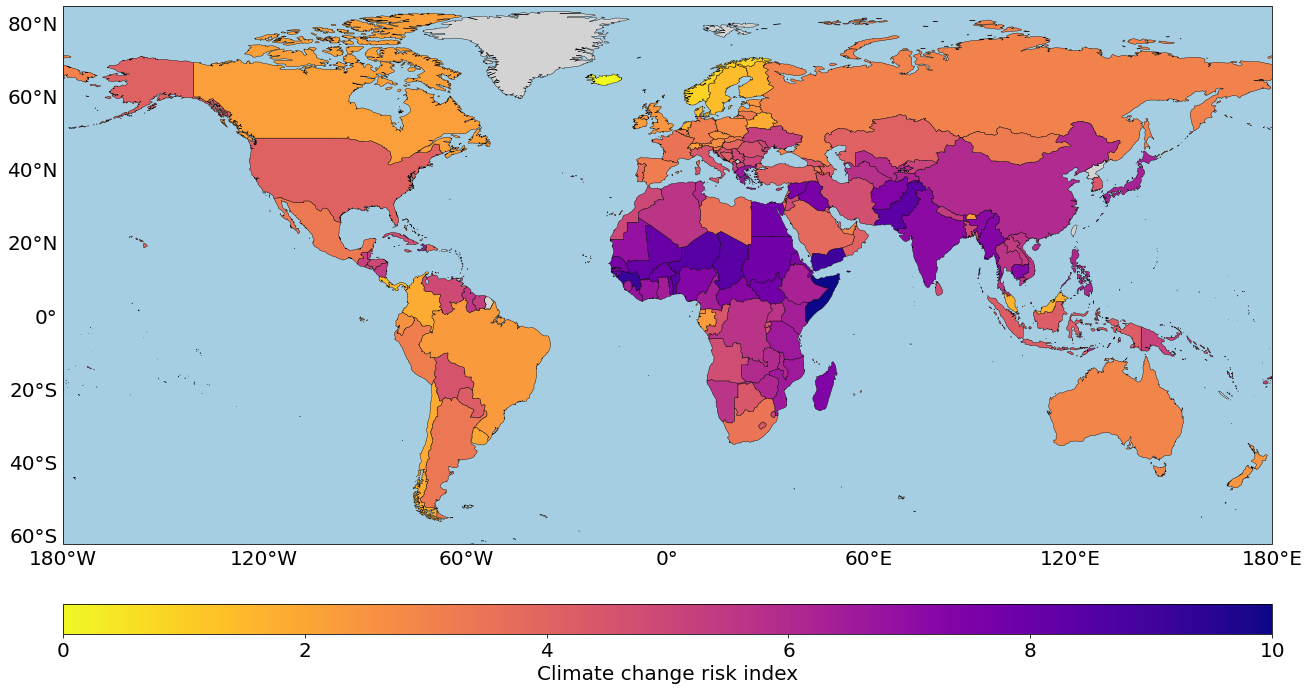

Countries without data: 0 countries
Countries most at risk: Somalia, Guinea, Yemen, Niger, Benin
SIDS most at risk: Guinea-Bissau, Haiti, Timor-Leste, Saint Kitts and Nevis, Antigua and Barbuda
LDC most at risk: Somalia, Guinea, Yemen, Niger, Benin
LLDC most at risk: Niger, Chad, Mali, Burkina Faso, South Sudan


,Name,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts",Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index,Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
0,Somalia,10.0,9.6,9.6,9.2,0.0,8.6,9.5,0.0,9.7,9.8,9.8,6.9,9.9
1,Guinea,9.1,8.5,9.2,8.0,3.6,8.9,3.5,0.0,9.5,8.6,9.6,8.0,9.0
2,Yemen,9.0,8.5,9.0,7.5,0.0,7.1,9.5,0.0,8.1,9.7,9.9,7.8,8.0
3,Niger,8.4,6.6,9.9,0.0,0.0,9.3,9.6,0.0,8.6,9.6,9.5,9.8,10.0
4,Benin,8.4,7.7,8.8,8.7,0.0,9.0,4.2,0.0,9.1,8.2,9.2,6.7,9.3
5,Chad,8.4,6.4,10.0,0.0,0.0,9.1,9.2,0.0,9.9,9.4,9.8,9.2,9.8
6,SIDS,4.4,4.6,5.0,2.9,3.7,0.8,2.0,3.5,5.5,5.5,4.2,6.2,4.1
7,LDC,6.6,5.0,8.3,2.6,0.9,5.7,4.5,0.5,8.1,8.6,8.0,7.5,8.0
8,LLDC,5.5,4.5,7.1,0.1,0.9,5.7,5.9,0.1,7.4,7.2,6.0,7.5,6.7
9,Asia,4.9,6.0,4.5,3.5,1.1,5.5,5.8,1.1,4.1,4.6,5.6,4.9,3.7


In [4]:
# Índice de riesgo por cambio climático
vn = "Climate change risk index"

# Cálculo del índice
df_iso[vn] = df_iso[index_n[1:3]].mean(axis = 1)
# Normalización 0-10
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * (df_iso[vn] - min_v ) / rng_v

# Guardamos el archivo
df_iso[ ["name", df_c.columns[6], df_s.columns[1], vn] ].to_csv(
    path_r + "climate_risk_index.csv" )

# Mapas
borders[df_c.columns[6]] = df_iso[df_c.columns[6]]
borders[df_s.columns[1]] = df_iso[df_s.columns[1]]
borders[vn] = df_iso[vn]

# Mapa de índice  de exposición climática
map_v = gv.Polygons( borders, vdims = df_c.columns[6] ).opts( **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
map_v = gv.Polygons( borders, vdims = df_c.columns[6] ).opts( **options_2 )
map = ( ocean * map_v ).opts( **options_m_2 )
hv.render(map).savefig( "../graphs/climate_index.pdf", bbox_inches = "tight" )
# Mapa de índice de vulnerabilidad socioeconómica
map_v = gv.Polygons( borders, vdims = df_s.columns[1] ).opts( **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
map_v = gv.Polygons( borders, vdims = df_s.columns[1] ).opts( **options_2 )
map = ( ocean * map_v ).opts( **options_m_2 )
hv.render(map).savefig( "../graphs/physical_vulnerability_index.pdf",
    bbox_inches = "tight" )
# Mapa de índice de riesgo de cambio climático
map_v = gv.Polygons( borders, vdims = vn ).opts( **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más en riesgo
disp = display( vn, type = "index" )
disp.style.format( dict(zip(index_n, ["{:.1f}"] * len(index_n))) )

In [5]:
# Cambiamos los resultados numéricos por valores categóricos

verbal = disp.copy()
risk = index_n[0]
cat_name = ["vulnerable", "exposed", "at risk"]
cat_name_2 = ["vulnerability", "exposure", "risk"]

for i, c in enumerate([social, climate, risk]):
    verbal[c] = verbal[c].where(
        (disp[c]<9), f"Extremely {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=9  ) | (disp[c]<7.5), f"Highly {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=7.5) | (disp[c]<5  ), f"Very {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=5  ) | (disp[c]<2.5  ), f"{str.capitalize(cat_name[i])}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=2.5  ) | (disp[c]<0  ), f"Low {cat_name_2[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>0), f"Not {cat_name[i]}" )
verbal[["Name"] + index_n[0:3] + ["Gender Development index index"]]

,Name,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts",Gender Development index index
0,Somalia,Extremely at risk,Extremely exposed,Extremely vulnerable,Extremely vulnerable
1,Guinea,Extremely at risk,Highly exposed,Extremely vulnerable,Extremely vulnerable
2,Yemen,Extremely at risk,Highly exposed,Highly vulnerable,Extremely vulnerable
3,Niger,Highly at risk,Very exposed,Extremely vulnerable,Extremely vulnerable
4,Benin,Highly at risk,Highly exposed,Highly vulnerable,Extremely vulnerable
5,Chad,Highly at risk,Very exposed,Extremely vulnerable,Extremely vulnerable
6,SIDS,At risk,Exposed,Very vulnerable,Vulnerable
7,LDC,Very at risk,Very exposed,Highly vulnerable,Highly vulnerable
8,LLDC,Very at risk,Exposed,Very vulnerable,Very vulnerable
9,Asia,At risk,Very exposed,Vulnerable,Very vulnerable


In [6]:
# Países extremadamente en riesgo

df_iso.loc[ (df_iso[index_n[1:3]] > 9).all(axis = 1), ["name"] + index_n
    ].style.format( dict(zip(index_n, ["{:.1f}"] * len(index_n))) )

,name,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts",Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index,Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
ISO_A3,,,,,,,,,,,,,,
SOM,Somalia,10.0,9.6,9.6,9.2,0.0,8.6,9.5,0.0,9.7,9.8,9.8,6.9,9.9


In [7]:
# Países altamente en riesgo

df_iso.loc[ (df_iso[index_n[1:3]] > 7.5).all(axis = 1), ["name"] + index_n
    ].style.format( dict(zip(index_n, ["{:.1f}"] * len(index_n))) )

,name,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts",Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index,Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
ISO_A3,,,,,,,,,,,,,,
BEN,Benin,8.4,7.7,8.8,8.7,0.0,9.0,4.2,0.0,9.1,8.2,9.2,6.7,9.3
GIN,Guinea,9.1,8.5,9.2,8.0,3.6,8.9,3.5,0.0,9.5,8.6,9.6,8.0,9.0
PAK,Pakistan,8.4,8.3,8.1,6.1,0.0,8.2,9.1,0.2,7.3,7.0,9.4,8.0,7.6
SOM,Somalia,10.0,9.6,9.6,9.2,0.0,8.6,9.5,0.0,9.7,9.8,9.8,6.9,9.9
YEM,Yemen,9.0,8.5,9.0,7.5,0.0,7.1,9.5,0.0,8.1,9.7,9.9,7.8,8.0


In [8]:
# Países más expuestos

df_iso[ ["name"] + index_n ].sort_values( index_n[1], ascending = False
    ).head(5).style.format( dict(zip(index_n, ["{:.1f}"] * len(index_n))) )

,name,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts",Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index,Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
ISO_A3,,,,,,,,,,,,,,
JPN,Japan,6.3,10.0,2.9,8.9,0.0,2.2,8.1,9.3,0.0,1.7,5.2,0.8,7.9
GRC,Greece,6.6,9.9,3.5,8.4,6.6,6.3,6.9,0.0,1.7,2.7,5.1,2.4,6.3
BHR,Bahrain,5.6,9.8,1.9,8.0,0.0,10.0,9.8,0.0,2.0,1.2,6.7,0.9,0.2
SOM,Somalia,10.0,9.6,9.6,9.2,0.0,8.6,9.5,0.0,9.7,9.8,9.8,6.9,9.9
KWT,Kuwait,4.4,9.2,0.3,9.9,0.0,6.5,9.8,0.0,1.8,0.8,0.9,0.1,0.2


In [9]:
# Países más vulnerables

df_iso[ ["name"] + index_n ].sort_values( index_n[2], ascending = False
    ).head(5).style.format( dict(zip(index_n, ["{:.1f}"] * len(index_n))) )

,name,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts",Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index,Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
ISO_A3,,,,,,,,,,,,,,
TCD,Chad,8.4,6.4,10.0,0.0,0.0,9.1,9.2,0.0,9.9,9.4,9.8,9.2,9.8
SSD,South Sudan,7.8,5.4,10.0,0.0,0.0,9.1,6.4,0.0,9.7,9.9,9.4,9.5,9.5
NER,Niger,8.4,6.6,9.9,0.0,0.0,9.3,9.6,0.0,8.6,9.6,9.5,9.8,10.0
CAF,Central African Republic,7.2,4.7,9.7,0.0,0.0,8.5,5.0,0.0,9.8,9.8,9.6,7.4,9.9
SOM,Somalia,10.0,9.6,9.6,9.2,0.0,8.6,9.5,0.0,9.7,9.8,9.8,6.9,9.9


In [10]:
# Países ordenados por GDI, detalle categórico

df_iso[ ["name"] + index_n ].sort_values( index_n[10], ascending = False
    ).dropna().head(5).style.format(
    dict(zip(index_n, ["{:.1f}"] * len(index_n))) )

verbal = df_iso[ ["name"] + index_n ].sort_values(
    index_n[10], ascending = False ).copy()
disp = df_iso

risk = index_n[0]
cat_name = ["vulnerable", "exposed", "at risk"]
cat_name_2 = ["vulnerability", "exposure", "risk"]

for i, c in enumerate([social, climate, risk]):
    verbal[c] = verbal[c].where(
        (disp[c]<9), f"Extremely {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=9  ) | (disp[c]<7.5), f"Highly {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=7.5) | (disp[c]<5  ), f"Very {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=5  ) | (disp[c]<2.5  ), f"{str.capitalize(cat_name[i])}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=2.5  ) | (disp[c]<0  ), f"Low {cat_name_2[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>0), f"Not {cat_name[i]}" )
cols = ["Name"] + index_n[0:3] + ["Sea level rise", "Drought",
    "Extreme heat", "Extreme rainfall", "Hurricanes", "Health",
    "Wealth", "Gender", "Rurality", "Age dependency" ]
verbal.columns = cols
verbal[cols].head(5).T

ISO_A3,YEM,AFG,SOM,TCD,IRQ
Name,Yemen,Afghanistan,Somalia,Chad,Iraq
Climate change risk index,Extremely at risk,Very at risk,Extremely at risk,Highly at risk,Highly at risk
Climate change exposure index,Highly exposed,Very exposed,Extremely exposed,Very exposed,Highly exposed
"Social vulnerability index, physical climate impacts",Highly vulnerable,Extremely vulnerable,Extremely vulnerable,Extremely vulnerable,Very vulnerable
Sea level rise,Highly exposed,Not exposed,Extremely exposed,Not exposed,Highly exposed
Drought,Not exposed,Not exposed,Not exposed,Not exposed,Low exposure
Extreme heat,Very exposed,Very exposed,Highly exposed,Extremely exposed,Very exposed
Extreme rainfall,Extremely exposed,Highly exposed,Extremely exposed,Extremely exposed,Extremely exposed
Hurricanes,Not exposed,Not exposed,Not exposed,Not exposed,Not exposed
Health,Highly vulnerable,Highly vulnerable,Extremely vulnerable,Extremely vulnerable,Very vulnerable


In [11]:
# Información para un país específico
country = ["MDG", "TZA", "ETH", "ZMB", "ARM"]

df_iso.loc[ country, ["name"] + index_n ].T

ISO_A3,MDG,TZA,ETH,ZMB,ARM
name,Madagascar,"Tanzania, United Republic of",Ethiopia,Zambia,Armenia
Climate change risk index,7.384534,6.530522,6.266085,5.971222,3.392546
Climate change exposure index,6.662955,5.013159,4.226975,4.073686,4.625512
"Social vulnerability index, physical climate impacts",8.019179,8.213269,8.548709,8.199389,3.252084
Sea level rise exposure index,3.606557,6.803279,0.0,0.0,0.0
Drought exposure index,2.396694,0.0,0.0,4.876033,0.0
Extreme heat exposure index,4.013158,3.421053,4.671053,6.25,5.131579
Extreme rainfall exposure index,3.212435,4.041451,7.357513,0.466321,8.031088
Hurricane exposure index,5.731707,0.0,0.0,0.0,0.0
Life expectancy at birth index,7.720207,7.202073,7.590674,8.756477,4.585492
